# Lecture 3c

## Test Statistics

This example will demonstrate the statistical properties of the test statistic

$$t = \frac{\hat\beta - \beta_{\text{null}}}{\text{SE}(\hat\beta)}$$


## The Statistical Properties of the test statistic under the ALTERNATIVE hypothesis w/ HETEROGENEITY

This example will demonstrate the distribution of the test statistic under an alternative hypothesis with heterogeneity $\beta_0=0$, $\beta_1=0.15$

**i.e., what would the test statistics look like if the alternative were true?**

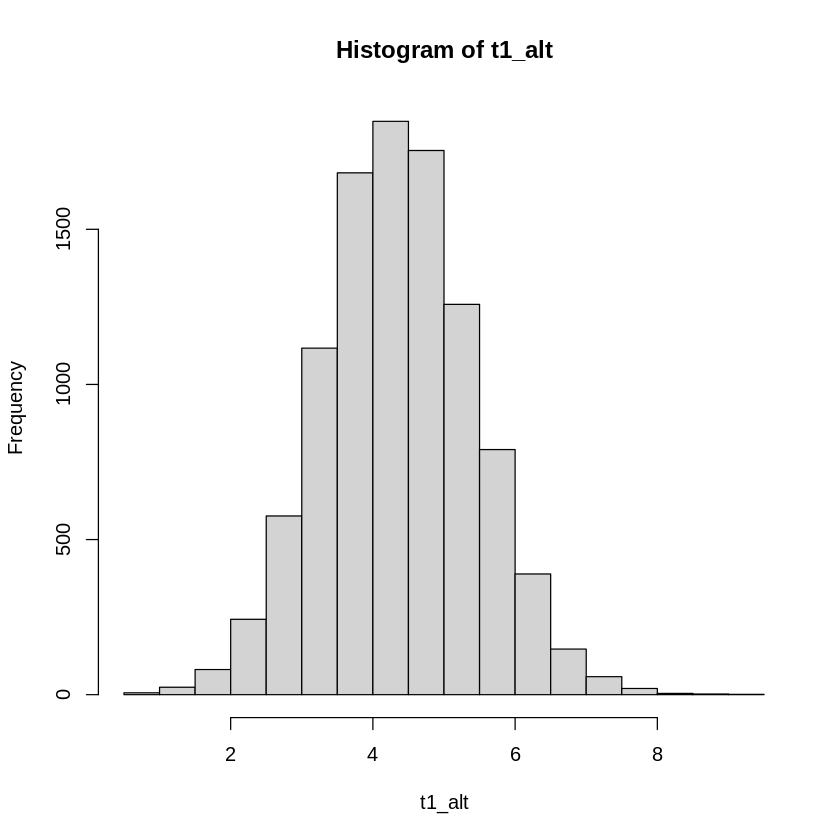

In [61]:
set.seed(1)
S <- 10000 #number of samples
n <- 100 #number of observations per sample

b0 <- 0
b1 <- .015 #the alternative is true, b1 is not 0

e <- replicate(S,rnorm(n)) #draw S samples

x <- 1:n

y <- b0 + b1*x + e


for (s in 1:S){
    lm.fit=lm(y[,s]~x) # estimate the linear model on the sample s.
    b1_alt[s] <- summary(lm.fit)$coefficients[2,1] #store estimate for beta_1
    t1_alt[s] <- summary(lm.fit)$coefficients[2,3]   #store the tstat for beta_1
}
hist(t1_alt)


In [54]:
set.seed(1)
S <- 10000 #number of samples
n <- 100 #number of observations per sample

b0 <- 0
b1 <- .010 #the alternative is true, b1 is not 0
b2 <- .020 #the alternative is true, but higher for G2

e <- replicate(S,rnorm(n)) #draw S samples

x <- 1:n
G1 <- rbinom(n,2,.5)
G2 <- 1-G1

y <- b0 + b1*x*G1 + b2*x*G2 + e


for (s in 1:S){
    lm.fit=lm(y[,s]~x) # estimate the linear model on the sample s.
    b1_alt_het[s] <- summary(lm.fit)$coefficients[2,1]   #store the estimate for beta_1 **note this beta_1 is the estimated effect for both groups**
    t1_alt_het[s] <- summary(lm.fit)$coefficients[2,3]   #store the tstats for beta_1
}



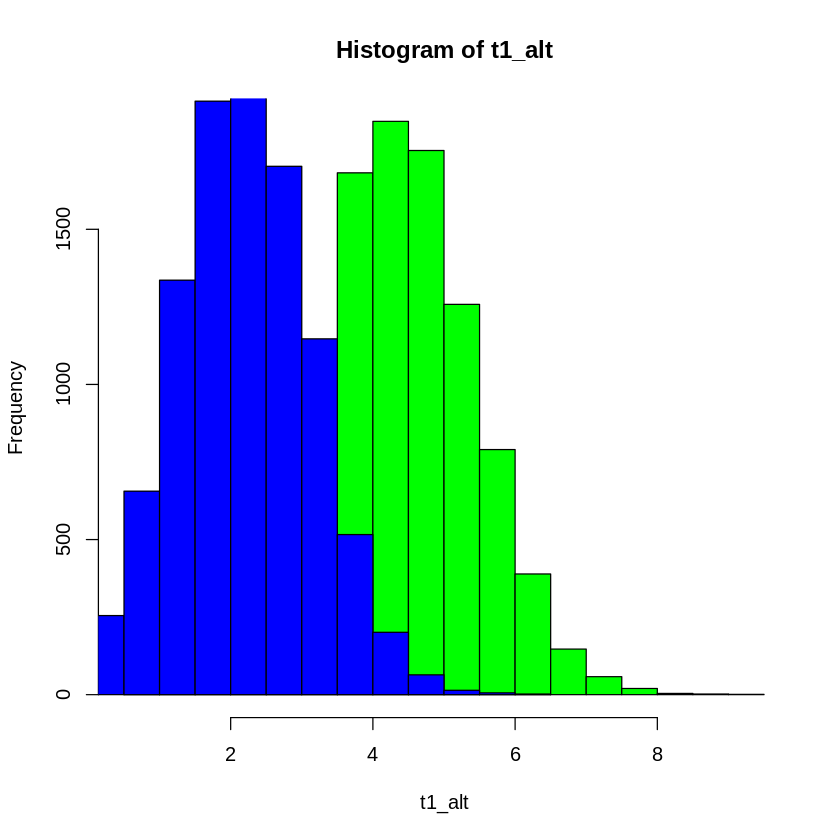

In [55]:
hist(t1_alt, col='green')
hist(t1_alt_het, col='blue', add=TRUE)

In [ ]:
install.packages('ggplot2')
library('ggplot2')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


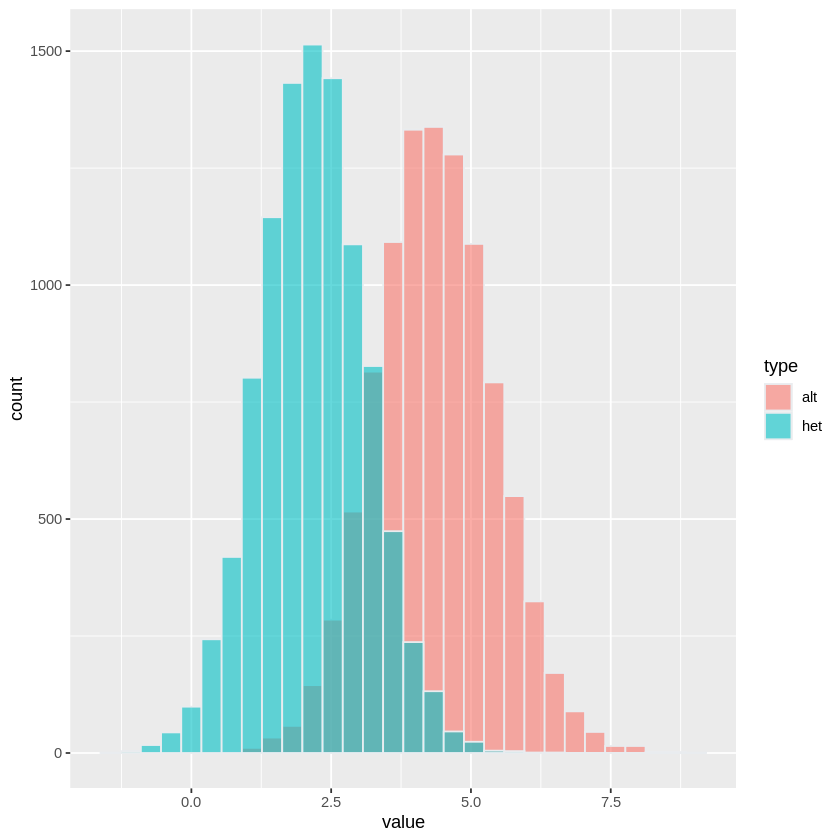

In [46]:

data <- data.frame(
  type = c(rep("alt", S),rep("het", S)),
  value = c(t1_alt,t1_alt_het) )

ggplot(data, aes(x=value, fill=type)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity')


Notice how this distribution where there is no heterogneity is shifted to the right (compared to the distribution with heterogeneity)?

This is because it has more power to reject the false null (there is lower variance in the estimate of the effect)

In [56]:
mean(b1_alt)
mean(b1_alt_het)

[1] 0.01500995

[1] 0.008091374

In [60]:
var(b1_alt)
var(b1_alt_het)

0.01454894,0.01581402,0.01576356,0.01234019,0.01633452,0.01712768,0.01175074,0.01454518,0.01630338,0.01236314,⋯,0.01098871,0.01703927,0.02235566,0.0199323,0.01047612,0.01629769,0.01597386,0.01563673,0.01395985,0.01526938


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


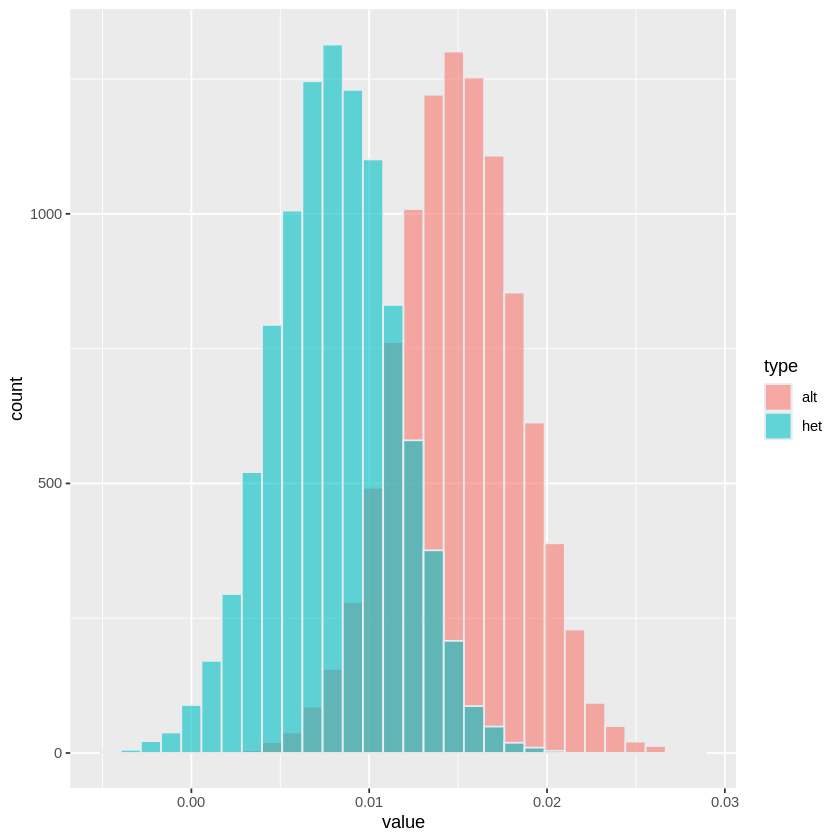

In [47]:
data <- data.frame(
  type = c(rep("alt", S),rep("het", S)),
  value = c(b1_alt,b1_alt_het) )

ggplot(data, aes(x=value, fill=type)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity')